In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from functions import *
from Layer import Layer, Input
from utils import *

In [2]:
df = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.train')
df_test = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.test')

In [3]:
#df = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.train")
#df_test = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.test")

In [4]:
X_train, y_train = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test, y_test = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

In [5]:
X_train = onehot_encoding(X_train)
X_test = onehot_encoding(X_test)

In [6]:
early_stopping = {'patience' : 150,
                  'monitor' : 'val_accuracy',
                  'verbose' : 0,
                  'compare_function': np.greater_equal}

reduce_eta = {'patience' : 75,
              'monitor' : 'val_accuracy',
              'factor' : 0.5,
              'verbose' : 0,
              'compare_function': np.greater_equal}

callbacks = {'early_stopping': None,
             'reduce_eta': None}

In [7]:
input_layer = Input(17)
hidden_layer = Layer(input_layer, 15, 'relu')
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy])
history = model.train(X_train, y_train.reshape((1,124)), epochs = 10,
                                    eta = 0.03, lam = 0.0, n_batch = 31,
                                    validation_split = 0.2,
                                    early_stopping=early_stopping,
                                    reduce_eta=reduce_eta
                                    )

(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 0: train_loss: 6.976e-01, val_loss: 6.864e-01; train_accuracy: 5.388e+01, val_accuracy: 5.733e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 1: train_loss: 6.582e-01, val_loss: 6.680e-01; train_accuracy: 6.786e+01, val_accuracy: 6.267e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 2: train_loss: 6.319e-01, val_loss: 6.504e-01; train_accuracy: 7.254e+01, val_accuracy: 6.533e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 3: train_loss: 6.087e-01, val_loss: 6.341e-01; train_accuracy: 7.559e+01, val_accuracy: 6.533e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 4: train_loss: 5.814e-01, val_loss: 6.219e-01; train_accuracy: 8.009e+01, val_accuracy: 6.667e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 5: train_loss: 5.538e-01, val_loss: 6.160e-01; train_accuracy: 8.439e+01, val_accuracy: 6.533e+01  lr : 0.03
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
Epoch 6: train_loss: 5.273e-01, val_loss: 6.164e-01; train_accuracy: 8.527e+01, val_accuracy: 6.800e

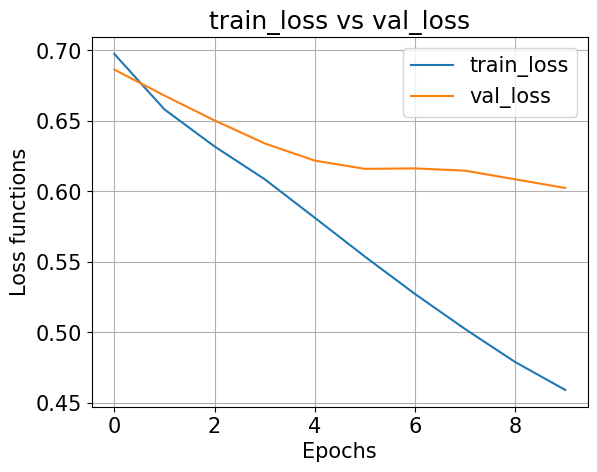

In [8]:
plt.plot(history['train_loss'],label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

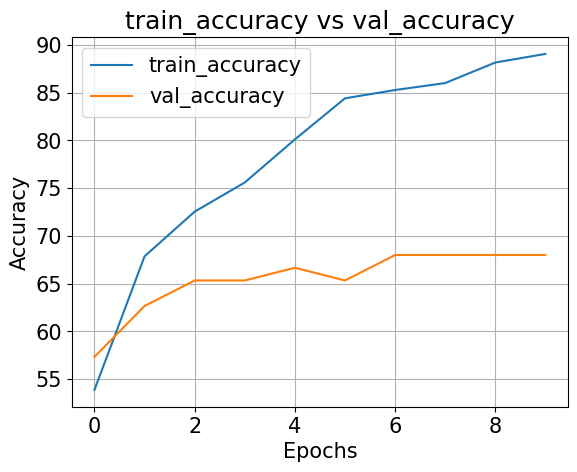

In [9]:
plt.plot(history['train_accuracy'],label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(accuracy(y_pred, y_test.reshape(y_pred.shape)))

73.61111111111111


In [12]:
a = np.array([1,2,3]).reshape((1,3))
print(a.shape)

(1, 3)


In [13]:
np.mean(a,axis=0)

array([1., 2., 3.])